In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.models import load_model
import csv
import numpy as np

Using TensorFlow backend.


In [2]:
shadow_train_files = ['test_shadow1.csv','test_shadow2.csv','test_shadow3.csv','test_shadow4.csv']

In [3]:
def load_shadow_train_data(shadow_train_files):
    shadow_train_x = []
    shadow_train_y = []
    for i in range(0,len(shadow_train_files)):
        
        shadow_train_sub = np.loadtxt('model\\'+shadow_train_files[i],delimiter=',')
        shadow_train_sub_x = shadow_train_sub[:,0:10]
        shadow_train_sub_y = shadow_train_sub[:,10]
        shadow_train_sub_x = shadow_train_sub_x.reshape(-1,10)[i*2000:i*2000+4000]
        shadow_train_sub_y = shadow_train_sub_y.reshape(-1,1)[i*2000:i*2000+4000]
        
        if i == 0:
            shadow_train_x = shadow_train_sub_x
            shadow_train_y = shadow_train_sub_y
        else:
            shadow_train_x = np.concatenate((shadow_train_x,shadow_train_sub_x), axis=0)
            shadow_train_y = np.concatenate((shadow_train_y,shadow_train_sub_y), axis=0)
    return shadow_train_x,shadow_train_y

In [4]:
shadow_train_x,shadow_train_y = load_shadow_train_data(shadow_train_files)

In [5]:
print(shadow_train_x.shape)
print(shadow_train_y.shape)

(16000, 10)
(16000, 1)


In [6]:
shadow_test = np.loadtxt('model\\test_shadow5.csv',delimiter=',')
shadow_test_x = shadow_test[:,0:10]
shadow_test_y = shadow_test[:,10]
shadow_test_x = shadow_test_x.reshape(-1,10)[6000:14000]
shadow_test_y = shadow_test_y.reshape(-1,1)[6000:14000]
print(shadow_test_x.shape)
print(shadow_test_y.shape)

(8000, 10)
(8000, 1)


In [7]:
model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu')) #把dense=1改为20
model.add(Dropout(0.5))
model.add(Dense(8,activation='relu')) #没有input 表示隐层神经元
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid')) #输出1维，表示是输出层神经元

In [8]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [9]:
history = model.fit(shadow_train_x, shadow_train_y,nb_epoch=10, batch_size=64,verbose=1)

D:\Anaconda3\envs\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
16000/16000 [==============================] - 0s 29us/step - loss: 0.6964 - acc: 0.4918
Epoch 2/10
16000/16000 [==============================] - 0s 15us/step - loss: 0.6940 - acc: 0.5000
Epoch 3/10
16000/16000 [==============================] - 0s 16us/step - loss: 0.6936 - acc: 0.4999
Epoch 4/10
16000/16000 [==============================] - 0s 15us/step - loss: 0.6936 - acc: 0.4964
Epoch 5/10
16000/16000 [==============================] - 0s 14us/step - loss: 0.6932 - acc: 0.5034
Epoch 6/10
16000/16000 [==============================] - 0s 14us/step - loss: 0.6930 - acc: 0.5038
Epoch 7/10
16000/16000 [==============================] - 0s 17us/step - loss: 0.6934 - acc: 0.5018
Epoch 8/10
16000/16000 [==============================] - 0s 14us/step - loss: 0.6933 - acc: 0.4960
Epoch 9/10
16000/16000 [==============================] - 0s 14us/step - loss: 0.6931 - acc: 0.5016
Epoch 10/10
16000/16000 [==============================] - 0s 14us/step - loss: 0.6931 - acc: 0.4972

In [10]:
# history = model.fit(shadow_train_x, shadow_train_y,nb_epoch=10, batch_size=64,verbose=1,
#                     validation_data=(x_test,y_test))

In [11]:
score = model.evaluate(shadow_test_x, shadow_test_y,batch_size=64, verbose=1)

8000/8000 [==============================] - 0s 12us/step


In [12]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6935012903213501
Test accuracy: 0.563


In [13]:
predictions = model.predict_classes(shadow_test_x)

In [14]:
print(predictions)

[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [15]:
import matplotlib.pyplot as plt

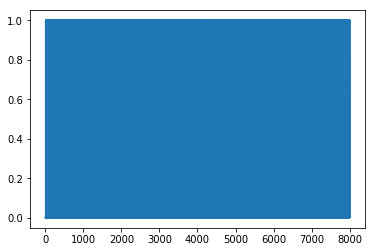

In [16]:
plt.plot(predictions)

In [18]:
model.save('model\\attack_model.h5')